In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [8]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

In [9]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
breast_cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
breast_cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
# 독립변수, 종속변수 분리
data = breast_cancer_data['data']
target = breast_cancer_data['target']

In [71]:
# 훈련데이터, 최종데이터 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(data, target, random_state=42)

In [ ]:
# ㅎ

In [72]:
# 분리 확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(426, 30) (426,)
(143, 30) (143,)


In [73]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [177]:
# 하이퍼파라미터 튜닝을 위한 그리드서치모델 불러오기
from sklearn.model_selection import GridSearchCV

In [79]:
# 교차검증 모델 불러오기
from sklearn.model_selection import cross_validate

## 1. KNN모델

In [104]:
# KNN모델 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [178]:
# 기본 데이터를 통한 모델 훈련 및 정확도 확인 (하이퍼파라미터 : default)
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)

print('<KNN> 기본 훈련데이터 정확도 :', round(kn.score(train_input, train_target),4))
print('<KNN> 기본 테스트데이터 정확도 :', round(kn.score(test_input, test_target),4))

# <해석>
# 전체적인 정확도는 매우 좋으나 훈련데이터 과소적합 발생

# <해결방안>
# 데이터 표준화(정규화)실행 후 정확도 확인

<KNN> 기본 훈련데이터 정확도 : 0.9343
<KNN> 기본 테스트데이터 정확도 : 0.965


In [179]:
# 정규화 데이터를 통한 모델 훈련 및 정확도 확인 (하이퍼파라미터 : default)
kn = KNeighborsClassifier()

kn.fit(train_scaled, train_target)

print('<KNN> 정규화 훈련데이터 정확도 :', round(kn.score(train_scaled, train_target),4))
print('<KNN> 정규화 테스트데이터 정확도 :', round(kn.score(test_scaled, test_target),4))

# <해석>
# 전체적인 정확도가 우수함 
# 훈련데이터의 약간의 과대적합이 의심되나 0.02의 적은 오차로 적절하다고 판단됨

<KNN> 정규화 훈련데이터 정확도 : 0.9789
<KNN> 정규화 테스트데이터 정확도 : 0.958


In [118]:
# 하이퍼파라미터 튜닝 및 교차검증을 통한 정확도 확인
kn = KNeighborsClassifier()

# 그리드 서치를 활용한 최적의 이웃갯수 값 탐색
params = {'n_neighbors' : range(3, 51, 2)}
gs = GridSearchCV(kn, params, n_jobs=-1)
gs.fit(train_input, train_target)

# 최적의 이웃갯수 값을 적용한 모델 생성
kn = gs.best_estimator_

# 교차검증을 통한 정확도 확인
scores = cross_validate(kn, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print('<KNN> 튜닝   훈련데이터 정확도 :', round(scores['train_score'].mean(),4))
print('<KNN> 튜닝 테스트데이터 정확도 :', round(scores['test_score'].mean(),4))

# <해석>
# 전체적인 정확도가 좋으나 정규화 모델보다 정확도가 떨어지는것을 확인
# 훈련데이터의 약간의 과대적합이 의심되나 0.01의 적은 오차로 적절하다고 판단됨

<KNN> 튜닝   훈련데이터 정확도 : 0.9343
<KNN> 튜닝 테스트데이터 정확도 : 0.9247


## 2. 로지스틱 회귀분류모델 

In [160]:
# 로지스틱 회귀분류모델 불러오기
from sklearn.linear_model import LogisticRegression

# 반복훈련횟수 설정 (독립변수의 갯수 * 100(기본값))
max_iter = len(breast_cancer_data['feature_names']) * 100

In [180]:
# 기본 데이터를 통한 모델 훈련 및 정확도 확인 (하이퍼파라미터 : max_iter = 독립변수의 갯수 * 100(기본값))
lr = LogisticRegression(max_iter=3000)

lr.fit(train_input, train_target)

print('<로지스틱> 기본   훈련데이터 정확도 :', round(lr.score(train_input, train_target),4))
print('<로지스틱> 기본 테스트데이터 정확도 :', round(lr.score(test_input, test_target),4))

# <해석>
# max_iter(훈련반복횟수) = 독립변수의 갯수 * 100(미지정시 경고창)
# 전체적인 정확도는 우수하나 훈련데이터 과소적합 발생

# <해결방안>
# 데이터 표준화(정규화)실행 후 정확도 확인

<로지스틱> 기본   훈련데이터 정확도 : 0.9601
<로지스틱> 기본 테스트데이터 정확도 : 0.965


In [190]:
# 기본 데이터를 통한 모델 훈련 및 정확도 확인 (하이퍼파라미터 : max_iter = 독립변수의 갯수 * 100(기본값))
lr = LogisticRegression(max_iter = max_iter)

lr.fit(train_scaled, train_target)

print('<로지스틱> 정규화   훈련데이터 정확도 :', round(lr.score(train_scaled, train_target),4))
print('<로지스틱> 정규화 테스트데이터 정확도 :', round(lr.score(test_scaled, test_target),4))

# <해석>
# max_iter(훈련반복횟수) = 독립변수의 갯수 * 100(미지정시 경고창)
# 전체적인 정확도가 매우 우수함 
# 훈련데이터의 아주 약간의 과대적합이 의심되나 0.006의 매우 적은 오차로 적절하다고 판단됨

<로지스틱> 정규화   훈련데이터 정확도 : 0.9859
<로지스틱> 정규화 테스트데이터 정확도 : 0.979


In [191]:
# 하이퍼파라미터 튜닝 및 교차검증을 통한 정확도 확인
lr = lr = LogisticRegression()

# 그리드 서치를 활용한 최적의 가중치, 훈련반복횟수 값 탐색
params = {'C' : np.arange(0.001, 0.01, 0.001),
          'max_iter' : range(3000, 5000, 1000)}

gs = GridSearchCV(lr, params, n_jobs=-1)
gs.fit(train_input, train_target)

# 최적의 이웃갯수 값을 적용한 모델 생성
lr = gs.best_estimator_

# # 교차검증을 통한 정확도 확인
scores = cross_validate(lr, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print('<로지스틱> 튜닝   훈련데이터 정확도 :', round(scores['train_score'].mean(),4))
print('<로지스틱> 튜닝 테스트데이터 정확도 :', round(scores['test_score'].mean(),4))

# <해석>
# 전체적인 정확도가 매우 좋으나 정규화 모델보다 정확도가 떨어지는것을 확인
# 훈련데이터의 아주 약간의 과대적합이 의심되나 0.01의 매우 적은 오차로 적절하다고 판단됨

<로지스틱> 튜닝   훈련데이터 정확도 : 0.9466
<로지스틱> 튜닝 테스트데이터 정확도 : 0.9343


## 3. SGD모델(확률적 경사하강법)

In [170]:
# SGD모델(확률적 경사하강법) 불러오기
from sklearn.linear_model import SGDClassifier

In [196]:
# 기본 데이터를 통한 모델 훈련 및 정확도 확인 (하이퍼파라미터 : max_iter = 독립변수의 갯수 * 100(기본값), random_state = 42)
sc = SGDClassifier(max_iter= max_iter, random_state=42)

sc.fit(train_input, train_target)

print('<SGD> 기본   훈련데이터 정확도 :', round(sc.score(train_input, train_target),4))
print('<SGD> 기본 테스트데이터 정확도 :', round(sc.score(test_input, test_target),4))

# <해석>
# max_iter(훈련반복횟수) = 독립변수의 갯수 * 100(미지정시 경고창)
# random_state = 42 정확도 고정을 위한 시드 설정
# 전체적인 정확도는 좋으나 훈련데이터 과소적합 발생

# <해결방안>
# 데이터 표준화(정규화)실행 후 정확도 확인

<SGD> 기본   훈련데이터 정확도 : 0.9014
<SGD> 기본 테스트데이터 정확도 : 0.9231


In [199]:
# 정규화 데이터를 통한 모델 훈련 및 정확도 확인 (하이퍼파라미터 : max_iter = 독립변수의 갯수 * 100(기본값), random_state = 42)
sc = SGDClassifier(max_iter= max_iter, random_state=42)

sc.fit(train_scaled, train_target)

print('<SGD> 정규화   훈련데이터 정확도 :', round(sc.score(train_scaled, train_target),4))
print('<SGD> 정규화 테스트데이터 정확도 :', round(sc.score(test_scaled, test_target),4))

# <해석>
# max_iter(훈련반복횟수) = 독립변수의 갯수 * 100(미지정시 경고창)
# random_state = 42 정확도 고정을 위한 시드 설정
# 전체적인 정확도가 우수함 
# 훈련데이터의 과대적합이 의심되나 0.02의 매우 적은 오차로 적절하다고 판단됨

<SGD> 정규화   훈련데이터 정확도 : 0.9765
<SGD> 정규화 테스트데이터 정확도 : 0.958


In [218]:
# 에포크 반복횟수 찾기
sc = SGDClassifier(random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 500회부터 3000회까지 테스트하여 정확도를 리스트에 저장
for _ in range(0,1500) :
    sc.partial_fit(train_scaled, train_target, classes= classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    
print('SGD 정규화   훈련데이터 리스트 갯수 :', len(train_score))
print('SGD 정규화 테스트데이터 리스트 갯수 :', len(test_score))

SGD 정규화   훈련데이터 리스트 갯수 : 1500
SGD 정규화 테스트데이터 리스트 갯수 : 1500


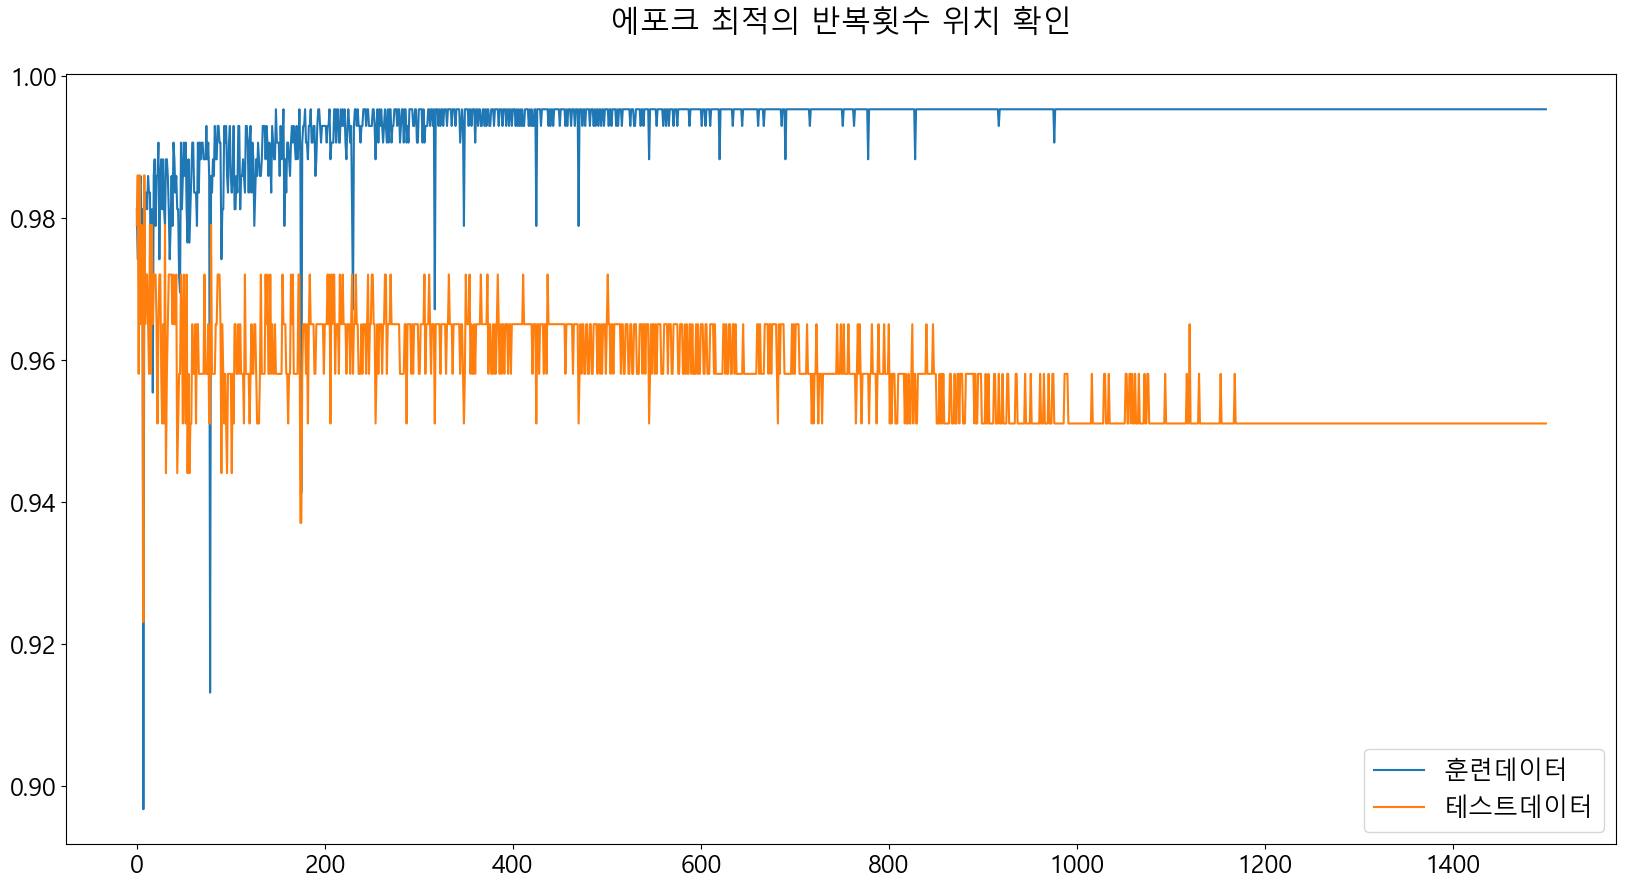

In [215]:
# 시각화를 통해 최적의 위치 찾기
fig = plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
plt.title('에포크 최적의 반복횟수 위치 확인', pad=30)
plt.plot(train_score, label = '훈련데이터')
plt.plot(test_score, label = '테스트데이터')
plt.legend(loc = 'lower right')
plt.show()

In [220]:
# 시각화를 토대로 테스트 횟수 재지정
# 시각화 확인 결과 반복횟수 1200회로 선정

# tol : 지정횟수만큼 강제 진행
sc = SGDClassifier(max_iter=1200, tol=None ,random_state=42)

sc.fit(train_scaled, train_target)

print('<SGD> 최적에포크   훈련데이터 정확도 :', round(sc.score(train_scaled, train_target),4))
print('<SGD> 최적에포크 테스트데이터 정확도 :', round(sc.score(test_scaled, test_target),4))

# <해석>
# max_iter(훈련반복횟수) = 시각화를 통한 최적의 반복횟수
# 전체적인 정확도가 매우 우수함 
# 훈련데이터의 약간의 과대적합이 의심되나 0.03의 적은 오차로 적절하다고 판단됨

<SGD> 최적에포크   훈련데이터 정확도 : 0.9953
<SGD> 최적에포크 테스트데이터 정확도 : 0.965


## 4. 랜덤포레스트 모델

In [221]:
# 랜덤포레스트 모델 불러오기
from sklearn.ensemble import RandomForestClassifier

In [229]:
# 기본 데이터를 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)

print('<랜덤포레스트> 기본   훈련데이터 정확도 :', round(rf.score(train_input, train_target),4))
print('<랜덤포레스트> 기본 테스트데이터 정확도 :', round(rf.score(test_input, test_target),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다
# 정규화를 통한 정확도 재측정

<랜덤포레스트> 기본   훈련데이터 정확도 : 1.0
<랜덤포레스트> 기본 테스트데이터 정확도 : 0.965


In [233]:
# 정규화 데이터를 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

rf.fit(train_scaled, train_target)

print('<랜덤포레스트> 정규화   훈련데이터 정확도 :', round(rf.score(train_scaled, train_target),4))
print('<랜덤포레스트> 정규화 테스트데이터 정확도 :', round(rf.score(test_scaled, test_target),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다
# 교차검증을 통한 정확도 재측정

<랜덤포레스트> 정규화   훈련데이터 정확도 : 1.0
<랜덤포레스트> 정규화 테스트데이터 정확도 : 0.965


In [249]:
# 교차검증을 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

scores = cross_validate(rf, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print('<랜덤포레스트> 교차검증   훈련데이터 정확도 :', round(scores['train_score'].mean(),4))
print('<랜덤포레스트> 교차검증 테스트데이터 정확도 :', round(scores['test_score'].mean(),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다

<랜덤포레스트> 교차검증   훈련데이터 정확도 : 1.0
<랜덤포레스트> 교차검증 테스트데이터 정확도 : 0.9577


## 5. 엑스트라트리 모델 

In [234]:
# 엑스트라트리 모델 불러오기
from sklearn.ensemble import ExtraTreesClassifier

In [235]:
# 기본 데이터를 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

et.fit(train_input, train_target)

print('<엑스트라트리> 기본   훈련데이터 정확도 :', round(et.score(train_input, train_target),4))
print('<엑스트라트리> 기본 테스트데이터 정확도 :', round(et.score(test_input, test_target),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다
# 정규화를 통한 정확도 재측정

<엑스트라트리> 기본   훈련데이터 정확도 : 1.0
<엑스트라트리> 기본 테스트데이터 정확도 : 0.979


In [236]:
# 정규화 데이터를 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

et.fit(train_scaled, train_target)

print('<엑스트라트리> 정규화   훈련데이터 정확도 :', round(et.score(train_scaled, train_target),4))
print('<엑스트라트리> 정규화 테스트데이터 정확도 :', round(et.score(test_scaled, test_target),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다
# 교차검증을 통한 정확도 재측정

<엑스트라트리> 정규화   훈련데이터 정확도 : 1.0
<엑스트라트리> 정규화 테스트데이터 정확도 : 0.979


In [237]:
# 교차검증을 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print('<엑스트라트리> 교차검증   훈련데이터 정확도 :', round(scores['train_score'].mean(),4))
print('<엑스트라트리> 교차검증 테스트데이터 정확도 :', round(scores['test_score'].mean(),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다

<엑스트라트리> 교차검증   훈련데이터 정확도 : 1.0
<엑스트라트리> 교차검증 테스트데이터 정확도 : 0.9624


## 7. 그레디언트부스팅 모델

In [239]:
# 그레디언트부스팅 모델 불러오기
from sklearn.ensemble import GradientBoostingClassifier

In [242]:
# 기본 데이터를 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
gb = GradientBoostingClassifier(random_state=42)

gb.fit(train_input, train_target)

print('<그레디언트부스팅> 기본   훈련데이터 정확도 :', round(gb.score(train_input, train_target),4))
print('<그레디언트부스팅> 기본 테스트데이터 정확도 :', round(gb.score(test_input, test_target),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다
# 정규화를 통한 정확도 재측정

<그레디언트부스팅> 기본   훈련데이터 정확도 : 1.0
<그레디언트부스팅> 기본 테스트데이터 정확도 : 0.958


In [243]:
# 정규화 데이터를 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
gb = GradientBoostingClassifier(random_state=42)

gb.fit(train_scaled, train_target)

print('<그레디언트부스팅> 정규화   훈련데이터 정확도 :', round(gb.score(train_scaled, train_target),4))
print('<그레디언트부스팅> 정규화 테스트데이터 정확도 :', round(gb.score(test_scaled, test_target),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다
# 교차검증을 통한 정확도 재측정

<그레디언트부스팅> 정규화   훈련데이터 정확도 : 1.0
<그레디언트부스팅> 정규화 테스트데이터 정확도 : 0.958


In [244]:
# 교차검증을 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
gb = GradientBoostingClassifier(random_state=42)

scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print('<그레디언트부스팅> 교차검증   훈련데이터 정확도 :', round(scores['train_score'].mean(),4))
print('<그레디언트부스팅> 교차검증 테스트데이터 정확도 :', round(scores['test_score'].mean(),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다

<그레디언트부스팅> 교차검증   훈련데이터 정확도 : 1.0
<그레디언트부스팅> 교차검증 테스트데이터 정확도 : 0.9624


## 8. 히스토그램기반 그레디언트부스팅 모델

In [245]:
# 히스토그램기반 그레디언트부스팅 모델 불러오기
from sklearn.ensemble import HistGradientBoostingClassifier

In [246]:
# 기본 데이터를 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
hgb = HistGradientBoostingClassifier(random_state=42)

hgb.fit(train_input, train_target)

print('<히스토그램기반 그레디언트부스팅> 기본   훈련데이터 정확도 :', round(hgb.score(train_input, train_target),4))
print('<히스토그램기반 그레디언트부스팅> 기본 테스트데이터 정확도 :', round(hgb.score(test_input, test_target),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다
# 정규화를 통한 정확도 재측정

<히스토그램기반 그레디언트부스팅> 기본   훈련데이터 정확도 : 1.0
<히스토그램기반 그레디언트부스팅> 기본 테스트데이터 정확도 : 0.951


In [247]:
# 정규화 데이터를 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
hgb = HistGradientBoostingClassifier(random_state=42)

hgb.fit(train_scaled, train_target)

print('<히스토그램기반 그레디언트부스팅> 정규화   훈련데이터 정확도 :', round(hgb.score(train_scaled, train_target),4))
print('<히스토그램기반 그레디언트부스팅> 정규화 테스트데이터 정확도 :', round(hgb.score(test_scaled, test_target),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다
# 교차검증을 통한 정확도 재측정

<히스토그램기반 그레디언트부스팅> 정규화   훈련데이터 정확도 : 1.0
<히스토그램기반 그레디언트부스팅> 정규화 테스트데이터 정확도 : 0.951


In [248]:
# 교차검증을 통한 모델 훈련 및 정확도 확인(하이퍼파라미터 : random_state = 42)
hgb = HistGradientBoostingClassifier(random_state=42)

scores = cross_validate(et, train_input, train_target,
                        return_train_score=True, n_jobs=-1)

print('<히스토그램기반 그레디언트부스팅> 교차검증   훈련데이터 정확도 :', round(scores['train_score'].mean(),4))
print('<히스토그램기반 그레디언트부스팅> 교차검증 테스트데이터 정확도 :', round(scores['test_score'].mean(),4))

# <해석>
# 정확도의 수치가 1.0로 사용할 수 없는 모델
# 확률적으로는 좋으나 과대적합의 여지가 있기 때문에 데이터의 수를 더 보강할 필요가 있어보인다

# <해결방안>
# 데이터의 부족으로 인한 수치 일 수 있으므로 더 많은 데이터를 통해 과대적합을 해소 할 수 있을 것으로 보인다

<히스토그램기반 그레디언트부스팅> 교차검증   훈련데이터 정확도 : 1.0
<히스토그램기반 그레디언트부스팅> 교차검증 테스트데이터 정확도 : 0.9624


In [ ]:
# <최종 모델 선택>

# <1순위>
# 로지스틱 회귀분류모델
# 훈련방법 - 정규화를 통한 훈련

# <정확도>
# <로지스틱> 정규화   훈련데이터 정확도 : 0.9859
# <로지스틱> 정규화 테스트데이터 정확도 : 0.979

# <선정 이유>
# 전체적인 정확도가 매우 우수하며 일반화도 0.006의 매우 적은 오차로 1순위 모델로 선정함

# ----------------------------------------------------------------------------------------------------------------

# <2순위>
# SGD모델(확률적 경사하강법)
# 훈련방법 - 최적 에포크(최적 반복훈련횟수)탐색을 통한 훈련

# <정확도>
# <SGD> 최적에포크   훈련데이터 정확도 : 0.9953
# <SGD> 최적에포크 테스트데이터 정확도 : 0.965

# <선정 이유>
# 전체적인 정확도가 매우 우수하며 일반화도 0.03의 적은 오차로 2순위 모델로 선정함

# ----------------------------------------------------------------------------------------------------------------


# <기타 특이점>
# 앙상블 모델의 경우 모든 모델이 훈련데이터의 과대적합으로인해 100%의 정확도가 나타남
# 이 현상은 데이터의 부족으로 인한 수치로 보이고 이를 해결하기 위해서는 더 많은 데이터를 수집할 필요가 있다고 판단됨